In [1]:
import pandas as pd
import numpy as np

In [2]:
# Read dataset

videos_emotion = pd.read_csv("data/depth_videos_emotion.csv")
videos_emotion

,title,video_id,url,channel,parent_id,parent,depth,lang,emotion,score
0,China Navy to BBC: 'Stay away from islands' - ...,LVeKbEgn50o,https://www.youtube.com/watch?v=LVeKbEgn50o,BBC News,nbBsh46aSz4,https://www.youtube.com/watch?v=nbBsh46aSz4,1,en,fear,0.643031
1,"Nike, H&M face backlash in China over Uighur s...",qC_qOoBFsMc,https://www.youtube.com/watch?v=qC_qOoBFsMc,DW News,s_eNkqwp_LA,https://www.youtube.com/watch?v=s_eNkqwp_LA,1,en,anger,0.971190
2,What do you do when someone just doesn't like ...,Y4gly9n9RBo,https://www.youtube.com/watch?v=Y4gly9n9RBo,TEDx Talks,s_eNkqwp_LA,https://www.youtube.com/watch?v=s_eNkqwp_LA,1,en,anger,0.491082
3,99 Years Later... We Solved It,JFFhD5HeByM,https://www.youtube.com/watch?v=JFFhD5HeByM,Physics Girl,tcKw5jiT6wg,https://www.youtube.com/watch?v=tcKw5jiT6wg,1,en,joy,0.903663
4,"Elon Musk talks Twitter, Tesla and how his bra...",cdZZpaB2kDM,https://www.youtube.com/watch?v=cdZZpaB2kDM,TED,tcKw5jiT6wg,https://www.youtube.com/watch?v=tcKw5jiT6wg,1,en,joy,0.969905
...,...,...,...,...,...,...,...,...,...,...
14327,The art of focus – a crucial ability | Christi...,xF80HzqvAoA,https://www.youtube.com/watch?v=xF80HzqvAoA,TEDx Talks,4AzpmZ7AjaQ,https://www.youtube.com/watch?v=4AzpmZ7AjaQ,5,en,joy,0.976567
14328,Why We Fear And Hold Back From What We Want | ...,tFDRXgDUea4,https://www.youtube.com/watch?v=tFDRXgDUea4,TEDx Talks,4AzpmZ7AjaQ,https://www.youtube.com/watch?v=4AzpmZ7AjaQ,5,en,anger,0.535442
14329,5 steps to designing the life you want | Bill ...,SemHh0n19LA,https://www.youtube.com/watch?v=SemHh0n19LA,TEDx Talks,vj-91dMvQQo,https://www.youtube.com/watch?v=vj-91dMvQQo,5,en,joy,0.911768
14330,Master Shi Heng Yi – 5 hindrances to self-mast...,4-079YIasck,https://www.youtube.com/watch?v=4-079YIasck,TEDx Talks,vj-91dMvQQo,https://www.youtube.com/watch?v=vj-91dMvQQo,5,en,joy,0.975544


In [3]:
# Calculates the normalized emotion proportions for each depth.

def calculate_label_means(df):
    
    # Find how many depth level are there.
    depth_num = df.depth.nunique()
    emotion_label_means = []
    
    # For each depth find the normalized mean of emotions
    for i in range(depth_num):
        # Store as dictionary
        emotion_label_means.append(df[df['depth'] == i+1]['emotion'].value_counts(normalize=True).to_dict())
        # Add depth level to the dictionary.
        emotion_label_means[i]['depth'] = i+1
    return emotion_label_means

In [4]:
# Example of emotion means for each depth
emotion_label_means = calculate_label_means(videos_emotion)
emotion_label_means

[{'anger': 0.40816326530612246,
  'joy': 0.32653061224489793,
  'fear': 0.14285714285714285,
  'sadness': 0.12244897959183673,
  'depth': 1},
 {'anger': 0.46938775510204084,
  'joy': 0.2653061224489796,
  'fear': 0.14285714285714285,
  'sadness': 0.11564625850340136,
  'surprise': 0.006802721088435374,
  'depth': 2},
 {'anger': 0.4195488721804511,
  'joy': 0.39849624060150374,
  'fear': 0.09774436090225563,
  'sadness': 0.08270676691729323,
  'surprise': 0.0015037593984962407,
  'depth': 3},
 {'joy': 0.4362094395280236,
  'anger': 0.3698377581120944,
  'fear': 0.09992625368731563,
  'sadness': 0.08333333333333333,
  'surprise': 0.008112094395280236,
  'love': 0.0025811209439528023,
  'depth': 4},
 {'joy': 0.5059949809461846,
  'anger': 0.33441769681197137,
  'fear': 0.08355795148247978,
  'sadness': 0.06348173622083837,
  'surprise': 0.01031694395389906,
  'love': 0.002230690584626824,
  'depth': 5}]

In [5]:
# Transform Emotion Dictionary to Emotion Dataframe

def create_df_emotions(mean_arr):
    # Create dataframe
    df_emotions = pd.DataFrame(mean_arr)
    # Give column names
    df_emotions = df_emotions[["depth", "anger","joy","fear","sadness","surprise","love"]]
    df_emotions.fillna(0, inplace = True)
    return df_emotions

In [6]:
df_emotions = create_df_emotions(emotion_label_means)
df_emotions

,depth,anger,joy,fear,sadness,surprise,love
0,1,0.408163,0.326531,0.142857,0.122449,0.000000,0.000000
1,2,0.469388,0.265306,0.142857,0.115646,0.006803,0.000000
2,3,0.419549,0.398496,0.097744,0.082707,0.001504,0.000000
3,4,0.369838,0.436209,0.099926,0.083333,0.008112,0.002581
4,5,0.334418,0.505995,0.083558,0.063482,0.010317,0.002231


In [7]:
# Drawing emotions with depth-emotion score

def draw_emotions(df, title):
    ax = df.plot(x="depth", figsize=(8,8));
    # Depth levels
    ax.set_xticks([1,2,3,4,5]);
    ax.set_title(title)
    ax.set_ylabel("Emotion Score");

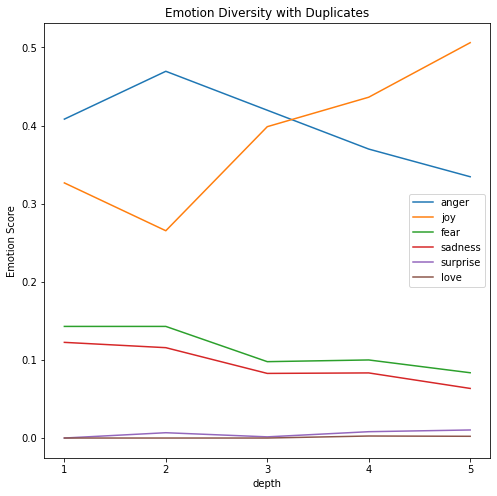

In [8]:
draw_emotions(df_emotions, "Emotion Diversity with Duplicates")

## Adding Emotion Scores as Weight

In [9]:
# Calculate normalized emotion prediction scores 

def calculate_score_means(df):
    
    # Find no. depth levels
    depth_num = df.depth.nunique()
    emotion_score_means = []

    # For each depth find the mean of prediction scores.
    for i in range(depth_num):
        # Store as dictionary
        emotion_score_means.append(df[df['depth'] == i+1].groupby('emotion')['score'].mean().to_dict())
    return emotion_score_means

In [10]:
# Example of prediction means
emotion_score_means = calculate_score_means(videos_emotion)
emotion_score_means

[{'anger': 0.6862077668309212,
  'fear': 0.6149021983146667,
  'joy': 0.8366644605994225,
  'sadness': 0.9803625742594401},
 {'anger': 0.7455704592276311,
  'fear': 0.6937656970251174,
  'joy': 0.7820878884731195,
  'sadness': 0.9180822705521303,
  'surprise': 0.6203252673149109},
 {'anger': 0.7464776057282656,
  'fear': 0.6669718797390277,
  'joy': 0.790783010113914,
  'sadness': 0.8645333826541901,
  'surprise': 0.5860821604728699},
 {'anger': 0.7497891575127751,
  'fear': 0.6825676375649512,
  'joy': 0.8125877560243099,
  'love': 0.8829560364995684,
  'sadness': 0.818605232687123,
  'surprise': 0.7920568504116752},
 {'anger': 0.7169582060123564,
  'fear': 0.6900889964337078,
  'joy': 0.8344841220749379,
  'love': 0.9039172182480494,
  'sadness': 0.8442063098596095,
  'surprise': 0.767930129089871}]

In [11]:
# Normalizes data. Specifically the total sum of each value sums up to 1.
def NormalizeData(arr):
    data_sum = np.sum(arr)
    return arr/data_sum

In [12]:
# Add weight to the emotion labels scores using prediction scores.
def multiple_means(emotion_mean1, emotion_mean2):
    emotion_depths = []
    
    # For each depth:
    for depth_level,depth_means in enumerate(emotion_mean1):

        label_and_scores = {}
        unnormalized_data = []
        
        # For each emotion label in that depth:
        for emotion in depth_means:
            
            # Multiply emotion label mean score with its prediction scores.
            unnormalized_data.append(emotion_mean1[depth_level][emotion]*emotion_mean2[depth_level][emotion])
        
        # Normalize the new scores.
        normalized_scores = NormalizeData(unnormalized_data)
        
        # Create new dictionary and add labels and normalized scores.
        for emotion, score in zip(depth_means, normalized_scores):
            label_and_scores[emotion] = score

        # Add depth level to the new dictionary.
        label_and_scores["depth"] = depth_level + 1
        emotion_depths.append(label_and_scores)
    return emotion_depths

In [13]:
# Example of weighted emotion scores
emotion_depths = multiple_means(emotion_score_means, emotion_label_means)
emotion_depths

[{'anger': 0.36796667858428417,
  'fear': 0.11540561864307868,
  'joy': 0.358917118152803,
  'sadness': 0.15771058461983417,
  'depth': 1},
 {'anger': 0.4562992600239524,
  'fear': 0.12922427336777803,
  'joy': 0.27054041318140465,
  'sadness': 0.1384339157548351,
  'surprise': 0.005502137672029793,
  'depth': 2},
 {'anger': 0.40891772434320206,
  'fear': 0.08512082596788101,
  'joy': 0.4114510286580452,
  'sadness': 0.09335969099031403,
  'surprise': 0.0011507300405576995,
  'depth': 3},
 {'anger': 0.35693800025586314,
  'fear': 0.08779457512321974,
  'joy': 0.45625508318288527,
  'love': 0.00293352515938871,
  'sadness': 0.08780831691537021,
  'surprise': 0.008270499363273018,
  'depth': 4},
 {'anger': 0.30613262155736715,
  'fear': 0.07362399948900471,
  'joy': 0.5391266569295554,
  'love': 0.0025745095818437563,
  'sadness': 0.06842643426063716,
  'surprise': 0.010115778181591812,
  'depth': 5}]

In [14]:
df_emotions_weighted = create_df_emotions(emotion_depths)
df_emotions_weighted

,depth,anger,joy,fear,sadness,surprise,love
0,1,0.367967,0.358917,0.115406,0.157711,0.000000,0.000000
1,2,0.456299,0.270540,0.129224,0.138434,0.005502,0.000000
2,3,0.408918,0.411451,0.085121,0.093360,0.001151,0.000000
3,4,0.356938,0.456255,0.087795,0.087808,0.008270,0.002934
4,5,0.306133,0.539127,0.073624,0.068426,0.010116,0.002575


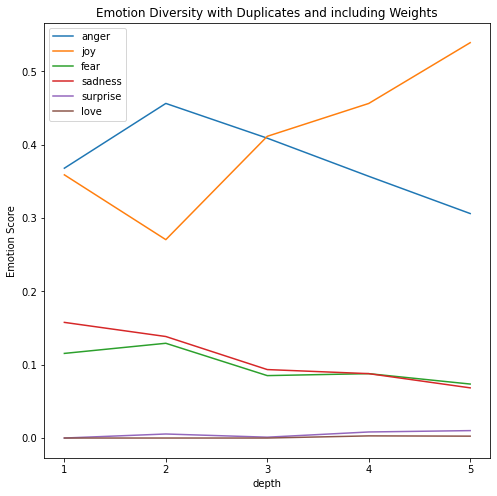

In [15]:
draw_emotions(df_emotions_weighted, "Emotion Diversity with Duplicates and including Weights")

## Analysing the Data Without Duplicates

In [16]:
# Keep the first original video titles by looking at video_id. 
no_dub_videos_emotion = videos_emotion.drop_duplicates(subset= "video_id", keep='first', inplace=False, ignore_index = True)
no_dub_videos_emotion

,title,video_id,url,channel,parent_id,parent,depth,lang,emotion,score
0,China Navy to BBC: 'Stay away from islands' - ...,LVeKbEgn50o,https://www.youtube.com/watch?v=LVeKbEgn50o,BBC News,nbBsh46aSz4,https://www.youtube.com/watch?v=nbBsh46aSz4,1,en,fear,0.643031
1,"Nike, H&M face backlash in China over Uighur s...",qC_qOoBFsMc,https://www.youtube.com/watch?v=qC_qOoBFsMc,DW News,s_eNkqwp_LA,https://www.youtube.com/watch?v=s_eNkqwp_LA,1,en,anger,0.971190
2,What do you do when someone just doesn't like ...,Y4gly9n9RBo,https://www.youtube.com/watch?v=Y4gly9n9RBo,TEDx Talks,s_eNkqwp_LA,https://www.youtube.com/watch?v=s_eNkqwp_LA,1,en,anger,0.491082
3,99 Years Later... We Solved It,JFFhD5HeByM,https://www.youtube.com/watch?v=JFFhD5HeByM,Physics Girl,tcKw5jiT6wg,https://www.youtube.com/watch?v=tcKw5jiT6wg,1,en,joy,0.903663
4,"Elon Musk talks Twitter, Tesla and how his bra...",cdZZpaB2kDM,https://www.youtube.com/watch?v=cdZZpaB2kDM,TED,tcKw5jiT6wg,https://www.youtube.com/watch?v=tcKw5jiT6wg,1,en,joy,0.969905
...,...,...,...,...,...,...,...,...,...,...
5681,Freedom from Self-Doubt | B.J. Davis | TEDxSac...,SaQQVevhZEM,https://www.youtube.com/watch?v=SaQQVevhZEM,TEDx Talks,v1ojZKWfShQ,https://www.youtube.com/watch?v=v1ojZKWfShQ,5,en,joy,0.968871
5682,Listen to the Monster in Your Closet | Star Ha...,qjzvH2wrpDg,https://www.youtube.com/watch?v=qjzvH2wrpDg,TEDx Talks,WiVHSRY2I5Y,https://www.youtube.com/watch?v=WiVHSRY2I5Y,5,en,anger,0.715019
5683,How Clothes Impact Your Life: Re-examining Fas...,it18TxNiGZc,https://www.youtube.com/watch?v=it18TxNiGZc,TEDx Talks,WiVHSRY2I5Y,https://www.youtube.com/watch?v=WiVHSRY2I5Y,5,en,joy,0.848567
5684,Why We Fear And Hold Back From What We Want | ...,tFDRXgDUea4,https://www.youtube.com/watch?v=tFDRXgDUea4,TEDx Talks,4AzpmZ7AjaQ,https://www.youtube.com/watch?v=4AzpmZ7AjaQ,5,en,anger,0.535442


In [17]:
# Example of emotion means for each depth
no_dub_emotion_label_means = calculate_label_means(no_dub_videos_emotion)
no_dub_emotion_label_means

[{'anger': 0.42857142857142855,
  'joy': 0.2857142857142857,
  'fear': 0.21428571428571427,
  'sadness': 0.07142857142857142,
  'depth': 1},
 {'anger': 0.44545454545454544,
  'joy': 0.3,
  'fear': 0.15454545454545454,
  'sadness': 0.09090909090909091,
  'surprise': 0.00909090909090909,
  'depth': 2},
 {'joy': 0.4263157894736842,
  'anger': 0.4,
  'fear': 0.1,
  'sadness': 0.07105263157894737,
  'surprise': 0.002631578947368421,
  'depth': 3},
 {'joy': 0.4630321135175504,
  'anger': 0.3368185212845407,
  'fear': 0.10306198655713218,
  'sadness': 0.07991038088125467,
  'surprise': 0.01194921583271098,
  'love': 0.005227781926811053,
  'depth': 4},
 {'joy': 0.5322538521807261,
  'anger': 0.3000783494384957,
  'fear': 0.09584747975972839,
  'sadness': 0.06085139723165317,
  'surprise': 0.009140767824497258,
  'love': 0.0018281535648994515,
  'depth': 5}]

In [18]:
# Create Dataframe
no_dub_df_emotions = create_df_emotions(no_dub_emotion_label_means)
no_dub_df_emotions

,depth,anger,joy,fear,sadness,surprise,love
0,1,0.428571,0.285714,0.214286,0.071429,0.000000,0.000000
1,2,0.445455,0.300000,0.154545,0.090909,0.009091,0.000000
2,3,0.400000,0.426316,0.100000,0.071053,0.002632,0.000000
3,4,0.336819,0.463032,0.103062,0.079910,0.011949,0.005228
4,5,0.300078,0.532254,0.095847,0.060851,0.009141,0.001828


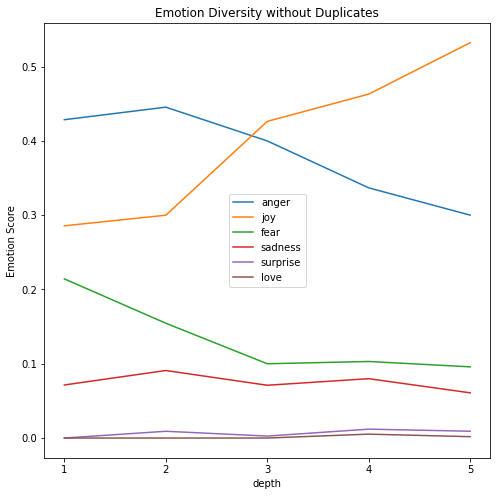

In [19]:
draw_emotions(no_dub_df_emotions, "Emotion Diversity without Duplicates")

## Adding Emotion Scores as Weight to Non-Duplicates

In [20]:
# Example of prediction means
no_dub_emotion_score_means = calculate_score_means(no_dub_videos_emotion)
no_dub_emotion_score_means

[{'anger': 0.7594389493266741,
  'fear': 0.6378365904092789,
  'joy': 0.7223198786377907,
  'sadness': 0.9760980606079102},
 {'anger': 0.7744329845418736,
  'fear': 0.7158448626013363,
  'joy': 0.7973155641194546,
  'sadness': 0.8787505716085434,
  'surprise': 0.6203252673149109},
 {'anger': 0.7385760151634091,
  'fear': 0.6808783466878691,
  'joy': 0.798708321319686,
  'sadness': 0.7875667346848382,
  'surprise': 0.5860821604728699},
 {'anger': 0.7440954598777839,
  'fear': 0.7045896899872932,
  'joy': 0.8098085908639816,
  'love': 0.8829560364995684,
  'sadness': 0.7798784258209657,
  'surprise': 0.8287740796804428},
 {'anger': 0.7280672020088391,
  'fear': 0.6907114458831195,
  'joy': 0.811507947121448,
  'love': 0.8507870776312692,
  'sadness': 0.8059216402630949,
  'surprise': 0.7880150147846767}]

In [21]:
# Example of weighted emotion scores
no_dub_emotion_depths = multiple_means(no_dub_emotion_score_means, no_dub_emotion_label_means)
no_dub_emotion_depths

[{'anger': 0.44087121271298185,
  'fear': 0.18513916844518594,
  'joy': 0.2795485106859281,
  'sadness': 0.09444110815590397,
  'depth': 1},
 {'anger': 0.44209066439314343,
  'fear': 0.14177486936273756,
  'joy': 0.3065318481399201,
  'sadness': 0.10237573727546537,
  'surprise': 0.0072268808287335295,
  'depth': 2},
 {'anger': 0.3879477004424164,
  'fear': 0.08941029205374053,
  'joy': 0.4471339205036041,
  'sadness': 0.0734827705221201,
  'surprise': 0.0020253164781187964,
  'depth': 3},
 {'anger': 0.3233670674965983,
  'fear': 0.09369274478420742,
  'joy': 0.48379865962792606,
  'love': 0.005955630038275957,
  'sadness': 0.08040837320664639,
  'surprise': 0.0127775248463458,
  'depth': 4},
 {'anger': 0.2821214739035763,
  'fear': 0.08548843468163189,
  'joy': 0.5577526018970854,
  'love': 0.0020084617855016724,
  'sadness': 0.06332765206954732,
  'surprise': 0.009301375662657275,
  'depth': 5}]

In [22]:
no_dub_df_emotions_weighted = create_df_emotions(no_dub_emotion_depths)
no_dub_df_emotions_weighted

,depth,anger,joy,fear,sadness,surprise,love
0,1,0.440871,0.279549,0.185139,0.094441,0.000000,0.000000
1,2,0.442091,0.306532,0.141775,0.102376,0.007227,0.000000
2,3,0.387948,0.447134,0.089410,0.073483,0.002025,0.000000
3,4,0.323367,0.483799,0.093693,0.080408,0.012778,0.005956
4,5,0.282121,0.557753,0.085488,0.063328,0.009301,0.002008


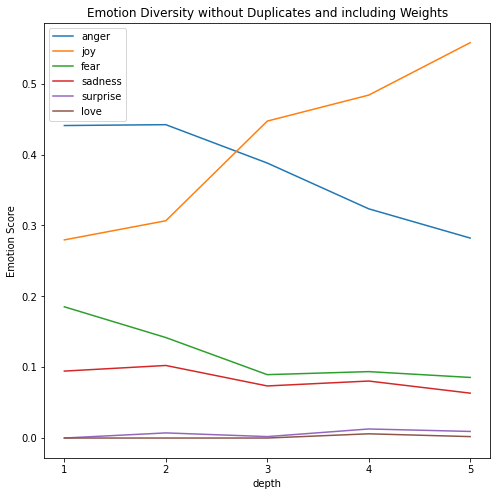

In [23]:
draw_emotions(no_dub_df_emotions_weighted, "Emotion Diversity without Duplicates and including Weights")